<a href="https://colab.research.google.com/github/alyxxxv/Data-Analyst-Portfolio/blob/main/Business_Data_Scientist_Intern_Online_Assessment_Aliyya_Dhiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Data Scientist Intern
Online Assessment - [Aliyya Dhiya Amru]

Bukit Vista collects Revenue information based on daily bookings. To create a
projection from daily data, we need to divide every booking with the length of stay and group it based on the date of stay to generate daily revenue during the night stayed. From the provided datasets, please produce an output dataset that shows the column date, and daily revenue sum. We calculate the revenue based on the date of stay. Bookings that are cancelled generates no revenue; while exchange rates are calculated upon guest payment during check_in.

in this project, we use "Pandas" to process our data. There are contains the dataset of booking, booking_status, currency, and exchange. 

In [ ]:
#import library pandas
import pandas as pd

In [ ]:
#import booking dataset from dropbox. 
booking=pd.read_csv('https://www.dropbox.com/s/4fe5on19gtdsp4b/booking.csv?dl=1') 
booking

,booking_received_timestamp,booking_status,booking_check_in,booking_check_out,booking_earned,booking_currency
0,2019-10-07 14:31:03,1,2019-11-01,2019-11-03,1164000.0,1
1,2019-09-12 21:36:36,1,2019-11-01,2019-11-02,783515.0,1
2,2019-09-17 10:00:37,1,2019-11-01,2019-11-04,1484999.0,1
3,2019-10-16 09:46:50,1,2019-11-01,2019-11-05,1741072.0,1
4,2019-09-13 17:47:08,1,2019-11-01,2019-11-02,48.0,2
...,...,...,...,...,...,...
10922,2020-02-04 23:50:53,2,2020-03-30,2020-03-31,0.0,1
10923,2020-03-30 08:19:54,1,2020-03-30,2020-03-31,436500.0,1
10924,2019-12-14 10:39:50,2,2020-03-30,2020-03-31,0.0,1
10925,2020-02-22 05:27:50,2,2020-03-30,2020-03-31,0.0,1


In [ ]:
#import booking_status dataset from dropbox. 
booking_status=pd.read_csv('https://www.dropbox.com/s/93fa4dqjgfnguaj/booking_status.csv?dl=1')
booking_status

,booking_status,booking_status_desc
0,1,Confirmed
1,2,Cancelled


In [ ]:
currency=pd.read_csv('https://www.dropbox.com/s/49wexjea5ib6ami/currency.csv?dl=1')
currency

,currency_code,currency_label,currency_desc
0,1,Rp,IDR
1,2,$,USD
2,3,?,EUR
3,4,AUD,AUD


In [ ]:
exchange=pd.read_csv('https://www.dropbox.com/s/3acrcwcg3o23mo6/exchange.csv?dl=1')
exchange

,id,date,base_currency,sgd,eur,aud,idr
0,2019-11-01,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.0880
1,2019-11-02,2019-11-02 19:26:16,USD,1.3581,0.8954,1.4474,13992.2000
2,2019-11-03,2019-11-03 19:26:16,USD,1.3578,0.8955,1.4472,13989.3000
3,2019-11-04,2019-11-04 19:26:18,USD,1.3570,0.8957,1.4466,14021.5000
4,2019-11-05,2019-11-05 19:26:16,USD,1.3566,0.8995,1.4451,14075.2595
...,...,...,...,...,...,...,...
147,2020-03-27,2020-03-27 22:29:24,USD,1.4343,0.9106,1.6497,16337.5000
148,2020-03-28,2020-03-28 22:29:24,USD,1.4278,0.8954,1.6220,16019.9640
149,2020-03-29,2020-03-29 22:29:24,USD,1.4278,0.8954,1.6220,16019.9640
150,2020-03-30,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.4000


after that, we check the dataset whether there is a missing value.

In [ ]:
booking.isna().sum()

booking_received_timestamp    0
booking_status                0
booking_check_in              0
booking_check_out             0
booking_earned                0
booking_currency              0
dtype: int64

In [ ]:
booking_status.isna().sum()

booking_status         0
booking_status_desc    0
dtype: int64

In [ ]:
currency.isna().sum()

currency_code     0
currency_label    0
currency_desc     0
dtype: int64

In [ ]:
exchange.isna().sum()

id               0
date             0
base_currency    0
sgd              0
eur              0
aud              0
idr              0
dtype: int64

# DATA DICTIONARY 

To perform further data processing, we need to understand the dataset that will be used. The following is a data dictionary of the dataset used.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| booking_status_timestamp  | When the hotel booking is made.                                                                                     |
| booking_status          | Status of booking. 1 for confirmed, 2 for cancelled.                                                                                  |
| booking_check_in | Date of check in                                                                                  |
| booking_check_out | Date of check out                                                                                     |
| booking earned | Total order to be paid                                                                                      |
| booking_currency | Currency ordered in making payment                                                                           |
| currency_label | Currency symbol                                                                                   |
| currency_desc | Description of currency code                                                                       |
| Id | Date Time of currency exchange rate                                                                  |
| Date | Date of movement of currency rates                                                                                           |
| base_currency | base currency (USD)                                                                         |
| sgd  | Singapore Dollar exchange rate                             |
| eur | Euro exchange rate                                                                 |
| aud | Australian Dollar exchange rate                                                                            |
| idr | Rupiah exchange rate                                                                                            |
                                                                 


# LEFT JOIN DATA

we know that to get daily revenue, then we have to **change** the payment from column (booking_earned) into **base currency (USD)**. For that, we have to "**Left Join**" some tables.



First, we do a Left Join from the booking data and booking_status by column "booking_status" to find out how many have been confirmed and canceled.

In [ ]:
#Left Join booking table on booking_status table 
df = pd.merge(booking, booking_status, on='booking_status', how='left')
df

,booking_received_timestamp,booking_status,booking_check_in,booking_check_out,booking_earned,booking_currency,booking_status_desc
0,2019-10-07 14:31:03,1,2019-11-01,2019-11-03,1164000.0,1,Confirmed
1,2019-09-12 21:36:36,1,2019-11-01,2019-11-02,783515.0,1,Confirmed
2,2019-09-17 10:00:37,1,2019-11-01,2019-11-04,1484999.0,1,Confirmed
3,2019-10-16 09:46:50,1,2019-11-01,2019-11-05,1741072.0,1,Confirmed
4,2019-09-13 17:47:08,1,2019-11-01,2019-11-02,48.0,2,Confirmed
...,...,...,...,...,...,...,...
10922,2020-02-04 23:50:53,2,2020-03-30,2020-03-31,0.0,1,Cancelled
10923,2020-03-30 08:19:54,1,2020-03-30,2020-03-31,436500.0,1,Confirmed
10924,2019-12-14 10:39:50,2,2020-03-30,2020-03-31,0.0,1,Cancelled
10925,2020-02-22 05:27:50,2,2020-03-30,2020-03-31,0.0,1,Cancelled


Next, we will also do a left join again with data exchange to get daily revenue. Here, I do a left join based on the booking_check_in column in the booking table and the id column in the exchange table. However, there is a difference in column names here. Thus, the column name (id) must be changed and matched in order for a left join to be performed.

In [ ]:
exchange.rename(columns = {'id':'Date'}, inplace = True)
exchange

,Date,date,base_currency,sgd,eur,aud,idr
0,2019-11-01,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.0880
1,2019-11-02,2019-11-02 19:26:16,USD,1.3581,0.8954,1.4474,13992.2000
2,2019-11-03,2019-11-03 19:26:16,USD,1.3578,0.8955,1.4472,13989.3000
3,2019-11-04,2019-11-04 19:26:18,USD,1.3570,0.8957,1.4466,14021.5000
4,2019-11-05,2019-11-05 19:26:16,USD,1.3566,0.8995,1.4451,14075.2595
...,...,...,...,...,...,...,...
147,2020-03-27,2020-03-27 22:29:24,USD,1.4343,0.9106,1.6497,16337.5000
148,2020-03-28,2020-03-28 22:29:24,USD,1.4278,0.8954,1.6220,16019.9640
149,2020-03-29,2020-03-29 22:29:24,USD,1.4278,0.8954,1.6220,16019.9640
150,2020-03-30,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.4000


In [ ]:
df.rename(columns = {'booking_check_in':'Date'}, inplace = True)
df

,booking_received_timestamp,booking_status,Date,booking_check_out,booking_earned,booking_currency,booking_status_desc
0,2019-10-07 14:31:03,1,2019-11-01,2019-11-03,1164000.0,1,Confirmed
1,2019-09-12 21:36:36,1,2019-11-01,2019-11-02,783515.0,1,Confirmed
2,2019-09-17 10:00:37,1,2019-11-01,2019-11-04,1484999.0,1,Confirmed
3,2019-10-16 09:46:50,1,2019-11-01,2019-11-05,1741072.0,1,Confirmed
4,2019-09-13 17:47:08,1,2019-11-01,2019-11-02,48.0,2,Confirmed
...,...,...,...,...,...,...,...
10922,2020-02-04 23:50:53,2,2020-03-30,2020-03-31,0.0,1,Cancelled
10923,2020-03-30 08:19:54,1,2020-03-30,2020-03-31,436500.0,1,Confirmed
10924,2019-12-14 10:39:50,2,2020-03-30,2020-03-31,0.0,1,Cancelled
10925,2020-02-22 05:27:50,2,2020-03-30,2020-03-31,0.0,1,Cancelled


In [ ]:
#Left Join df table on exchange table 
df1 = pd.merge(df, exchange, on='Date', how='left')
df1

,booking_received_timestamp,booking_status,Date,booking_check_out,booking_earned,booking_currency,booking_status_desc,date,base_currency,sgd,eur,aud,idr
0,2019-10-07 14:31:03,1,2019-11-01,2019-11-03,1164000.0,1,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088
1,2019-09-12 21:36:36,1,2019-11-01,2019-11-02,783515.0,1,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088
2,2019-09-17 10:00:37,1,2019-11-01,2019-11-04,1484999.0,1,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088
3,2019-10-16 09:46:50,1,2019-11-01,2019-11-05,1741072.0,1,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088
4,2019-09-13 17:47:08,1,2019-11-01,2019-11-02,48.0,2,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,2020-02-04 23:50:53,2,2020-03-30,2020-03-31,0.0,1,Cancelled,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.400
10923,2020-03-30 08:19:54,1,2020-03-30,2020-03-31,436500.0,1,Confirmed,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.400
10924,2019-12-14 10:39:50,2,2020-03-30,2020-03-31,0.0,1,Cancelled,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.400
10925,2020-02-22 05:27:50,2,2020-03-30,2020-03-31,0.0,1,Cancelled,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.400


# Make Revenue - data processing

After the join, then we change the currency value into base_currency (Dollar).

Example :

In line 1, payment is made using boking_currency code [1]. That is, the user makes an order transaction using IDR - Rupiah. Since the value in this "booking_earned" column differs according to the currency_label, it must be converted to USD($) based on the base_currency. So the formula is: 

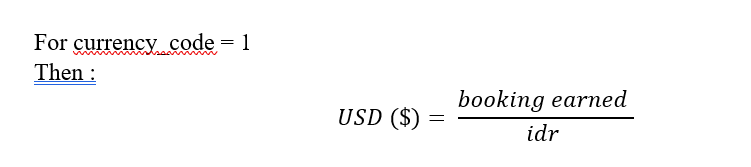

So, to make things easier, we use If-elif-else condition in python when we want to add the [daily_revenue] column

In [ ]:
#use the if-elif-else condition to add a column according to the currency_code value used in the payment transaction.
def get_revenue(df1_row): 
  if df1_row['booking_currency'] == 1 : 
    daily_revenue = df1_row['booking_earned']/df1_row['idr']
  elif df1_row['booking_currency'] == 2:
    daily_revenue = df1_row['booking_earned']
  elif df1_row['booking_currency'] == 3:
    daily_revenue = df1_row['booking_earned']/df1_row['eur']
  else:
    daily_revenue = df1_row['booking_earned']/df1_row['aud']
  return daily_revenue

df1['daily_revenue($)'] = df1.apply(get_revenue, axis=1)
df1

,booking_received_timestamp,booking_status,Date,booking_check_out,booking_earned,booking_currency,booking_status_desc,date,base_currency,sgd,eur,aud,idr,daily_revenue($)
0,2019-10-07 14:31:03,1,2019-11-01,2019-11-03,1164000.0,1,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088,82.958642
1,2019-09-12 21:36:36,1,2019-11-01,2019-11-02,783515.0,1,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088,55.841357
2,2019-09-17 10:00:37,1,2019-11-01,2019-11-04,1484999.0,1,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088,105.836340
3,2019-10-16 09:46:50,1,2019-11-01,2019-11-05,1741072.0,1,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088,124.086742
4,2019-09-13 17:47:08,1,2019-11-01,2019-11-02,48.0,2,Confirmed,2019-11-01 19:26:17,USD,1.3579,0.8964,1.4489,14031.088,48.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,2020-02-04 23:50:53,2,2020-03-30,2020-03-31,0.0,1,Cancelled,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.400,0.000000
10923,2020-03-30 08:19:54,1,2020-03-30,2020-03-31,436500.0,1,Confirmed,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.400,27.229514
10924,2019-12-14 10:39:50,2,2020-03-30,2020-03-31,0.0,1,Cancelled,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.400,0.000000
10925,2020-02-22 05:27:50,2,2020-03-30,2020-03-31,0.0,1,Cancelled,2020-03-30 22:29:26,USD,1.4243,0.9065,1.6267,16030.400,0.000000


voila, finally we can calculate the revenue value and convert it to USD($) based on base_currency.

After that, we add up all the revenue and do a group by booking_check_in.

In [ ]:
revenue = df1.groupby(['Date']).sum()
revenue

,booking_status,booking_earned,booking_currency,sgd,eur,aud,idr,daily_revenue($)
Date,,,,,,,,
2019-11-01,108,1.714483e+08,98,123.5689,81.5724,131.8499,1276829.008,13178.105318
2019-11-02,95,1.242592e+08,100,119.5128,78.7952,127.3712,1231313.600,12101.378282
2019-11-03,76,8.679125e+07,73,92.3304,60.8940,98.4096,951272.400,6961.062391
2019-11-04,65,9.106974e+07,69,81.4200,53.7420,86.7960,841290.000,8788.843704
2019-11-05,84,1.368455e+08,81,100.3884,66.5630,106.9374,1041569.203,11346.296488
...,...,...,...,...,...,...,...,...
2020-03-26,57,1.428382e+07,34,43.0500,27.3360,49.6830,481950.000,889.126760
2020-03-27,41,1.148075e+07,26,34.4232,21.8544,39.5928,392100.000,932.599962
2020-03-28,53,4.177790e+06,32,41.4062,25.9666,47.0380,464578.956,260.786479


After the group by is done, a new data is obtained. Here, we only need the values of Date and daily_revenue only. So, we need to drop the unneeded columns.

So this is the Output of dataset. We already know the daily revenue based on date. 

In [ ]:
revenue_per_day = revenue.drop(columns=['booking_status', 'booking_earned', 'booking_currency', 'sgd', 'eur', 'aud', 'idr'])
revenue_per_day

,daily_revenue($)
Date,
2019-11-01,13178.105318
2019-11-02,12101.378282
2019-11-03,6961.062391
2019-11-04,8788.843704
2019-11-05,11346.296488
...,...
2020-03-26,889.126760
2020-03-27,932.599962
2020-03-28,260.786479


I also make this visualization to know how much revenue was generated on a given date. From the visualization, it was found that December experienced the highest revenue in 2019. However, revenue from Bukitvista always decreases every time, especially in March 2020 due to the covid-19 pandemic.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fad28bd2e90>],
      dtype=object)

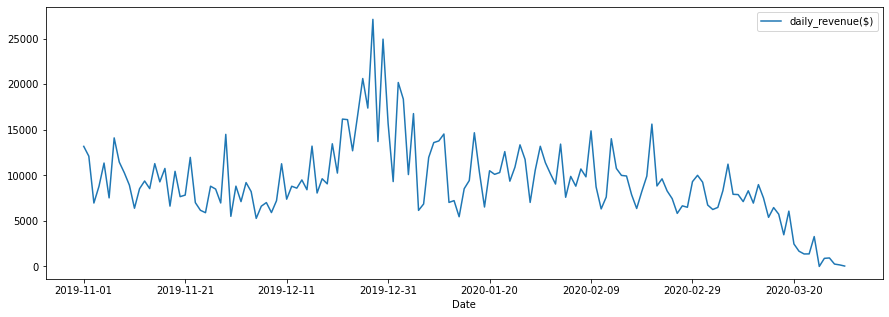

In [ ]:
revenue_per_day.plot(subplots=True, figsize=(15, 5))

To download the processed dataset, you can run the code below.

In [ ]:
from google.colab import files
revenue_per_day.to_csv('revenue_per_day.csv') 
files.download('revenue_per_day.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>